In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer



# Read in data 

In [244]:
df_orig = pd.read_csv("/Users/rickiheicklen/Github/scholars-and-sommeliers/data.csv")
df_sources = df_orig[[x for x in df_orig.columns if 'Source' in x or 'Person' in x]]
df_wines = df_orig[[x for x in df_orig.columns if 'Wine' in x or 'Person' in x]]

In [245]:
# Sources:
# Abarbanel, Bartenura, Alfasi, Sforno, Rashi, Schwartz

df_sources = df_sources.rename(columns={'Source 1': 'Abarbanel', 
                   'Source 2': 'Bartenura',
                   'Source 3': 'Alfasi',
                   'Source 4': 'Sforno',
                   'Source 5': 'Rashi',
                   'Source 6': 'Schwartz'})

# Wines: 
# Alfasi, Abarbanel, Bartenura, Rashi, Sforno, Schwartz

df_wines = df_wines.rename(columns={'Wine A': 'Alfasi', 
                   'Wine B': 'Abarbanel',
                   'Wine C': 'Bartenura',
                   'Wine D': 'Rashi',
                   'Wine E': 'Sforno',
                   'Wine F': 'Schwartz'
                   })
                

In [246]:
df_sources_long = df_sources.melt(id_vars=["Person"], var_name="Rishon", value_name="Source")
df_wines_long = df_wines.melt(id_vars=["Person"], var_name="Rishon", value_name="Wine")

In [247]:
df = pd.merge(df_sources_long, df_wines_long, on=['Person', 'Rishon'])

In [285]:
# Select the columns to impute
numeric_cols = ['Source', 'Wine']
# Select the numerical columns
# numeric_cols = df.select_dtypes(include='number').columns

# Group the data by the 'group' column
groups = df.groupby('Person')

# Create a SimpleImputer to impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Iterate over the groups and apply the SimpleImputer to the numerical columns of each group
df_imputed = pd.concat([group[group.columns[~group.columns.isin(numeric_cols)]].assign(**{col: imputer.fit_transform(group[[col]]) for col in numeric_cols}) for _, group in groups])

In [289]:
# Set which variable to color the points by (either Person or Rishon)
factor = "Rishon"

colors, color_labels = pd.factorize(df_imputed[factor])
color_labels = color_labels.tolist()

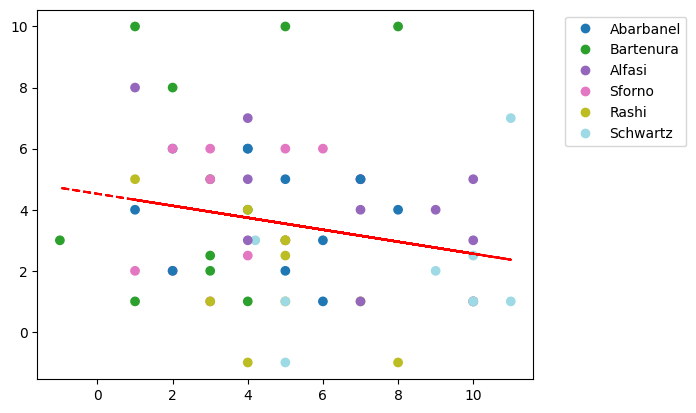

In [296]:
color_map = cm.get_cmap('tab20')

x = df_imputed['Source']
y = df_imputed['Wine']

# Fit a linear regression model
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Create the scatterplot
scatter = plt.scatter(x, y, c=colors, cmap=color_map)

plt.plot(x, polynomial(x), "r--")

handles, _ = scatter.legend_elements()

# Add the legend
plt.legend(handles=handles, labels=color_labels, bbox_to_anchor=(1.05, 1))

# Everything below this is scrap for now

In [220]:
# Some code we are no longer using:
# 
# # # Create the scatter plot
# scatter = plt.scatter(df['score_source'], df['score_wine'], c=df['rishon_encoded'], cmap="viridis")

# # Add the color bar
# colorbar = plt.colorbar(scatter, label="Person")

# # Set the tick marks and labels on the color bar
# colorbar.set_ticks(range(len(person_labels)))
# colorbar.set_ticklabels(person_labels)


# plt.legend(handles=df["person_encoded"], labels=person_labels)

# # Add the color bar
# colorbar = plt.colorbar(scatter, cmap=color_map, label="Person",  extendfrac="auto", spacing="uniform", boundaries)
 
# # Set the tick marks and labels on the color bar
# colorbar.set_ticks(range(len(person_labels)))
# colorbar.set_ticklabels(person_labels)

In [119]:
df = pd.read_csv("/Users/rickiheicklen/Github/scholars-and-sommeliers/data.csv")
df_sources = df_orig[[x for x in df_orig.columns if 'Source' in x or 'Person' in x]]
df_wines = df_orig[[x for x in df_orig.columns if 'Wine' in x or 'Person' in x]]
df_sources['Type'] = "Source"
df_wines['Type'] = "Wine"

/var/folders/tg/2ykccs2s52s97l3x96m04n1w0000gn/T/ipykernel_19958/2577672190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sources['Type'] = "Source"
/var/folders/tg/2ykccs2s52s97l3x96m04n1w0000gn/T/ipykernel_19958/2577672190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wines['Type'] = "Wine"


In [121]:
# Wines:
# Abarbanel, Bartenura, Alfasi, Sforno, Rashi, Schwartz

# Wines: 
# Alfasi, Abarbanel, Bartenura, Rashi, Sforno, Schwartz

df_orig.rename(columns={'Source 1': 'Abarbanel (Source)', 
                   'Source 2': 'Bartenura (Source)',
                   'Source 3': 'Alfasi (Source)',
                   'Source 4': 'Sforno (Source)',
                   'Source 5': 'Rashi (Source)',
                   'Source 6': 'Schwartz (Source)',
                   'Wine A': 'Alfasi (Wine)', 
                   'Wine B': 'Abarbanel (Wine)',
                   'Wine C': 'Bartenura (Wine)',
                   'Wine D': 'Rashi (Wine)',
                   'Wine E': 'Sforno (Wine)',
                   'Wine F': 'Schwartz (Wine)'
                   },
                   inplace=True)

In [122]:
df_orig
df.melt(id_vars=["Person", "Type"], var_name="Rishon", value_name="score").head(60)

,Person,Abarbanel (Source),Bartenura (Source),Alfasi (Source),Sforno (Source),Rashi (Source),Schwartz (Source),Alfasi (Wine),Abarbanel (Wine),Bartenura (Wine),Rashi (Wine),Sforno (Wine),Schwartz (Wine)
0,Ricki Heicklen,4,8,9,6,1,11.0,4,6,10.0,5.0,6.0,7.0
1,Joe Blumberg,4,4,7,7,8,11.0,4,6,1.0,-1.0,5.0,1.0
2,Daniel Peled-Schwartz,5,-1,10,3,7,5.0,5,5,3.0,1.0,6.0,-1.0
3,Avital Morris,8,4,4,3,10,9.0,5,4,4.0,1.0,1.0,2.0
4,Chana Fisch,5,3,10,4,5,10.0,3,2,NaN,NaN,NaN,NaN
5,Jen Greenberg,1,1,1,1,5,10.0,8,4,10.0,3.0,2.0,1.0
6,Jasmine Peled-Schwartz,2,5,5,5,4,10.0,3,6,10.0,4.0,6.0,1.0
7,Ronit Morris,6,1,7,2,5,10.0,1,3,1.0,1.0,2.0,1.0
8,Susan Palefsky,2,3,4,3,4,5.0,3,2,5.0,-1.0,5.0,1.0
9,Tadhg Cleary,7,2,4,10,5,10.0,7,5,8.0,3.0,1.0,1.0


In [127]:
df_sources_long = df_sources.melt(id_vars=["Person", "Type"], var_name="Rishon", value_name="score")
df_wines_long = df_wines.melt(id_vars=["Person", "Type"], var_name="Rishon", value_name="score")

In [131]:
pd.merge(df_sources_long, df_wines_long, on=['Person', 'Rishon'], suffixes=('_source', '_wine'))

,Person,Type_source,Rishon,score_source,Type_wine,score_wine
0,Ricki Heicklen,Source,Abarbanel,4.0,Wine,6.0
1,Joe Blumberg,Source,Abarbanel,4.0,Wine,6.0
2,Daniel Peled-Schwartz,Source,Abarbanel,5.0,Wine,5.0
3,Avital Morris,Source,Abarbanel,8.0,Wine,4.0
4,Chana Fisch,Source,Abarbanel,5.0,Wine,2.0
...,...,...,...,...,...,...
61,Jasmine Peled-Schwartz,Source,Schwartz,10.0,Wine,1.0
62,Ronit Morris,Source,Schwartz,10.0,Wine,1.0
63,Susan Palefsky,Source,Schwartz,5.0,Wine,1.0
64,Tadhg Cleary,Source,Schwartz,10.0,Wine,1.0


In [117]:
df.melt(id_vars=["Person", "Type"], var_name="Rishon", value_name="score").head(60)

,Person,Type,Rishon,score
0,Ricki Heicklen,Source,Abarbanel,4.0
1,Joe Blumberg,Source,Abarbanel,4.0
2,Daniel Peled-Schwartz,Source,Abarbanel,5.0
3,Avital Morris,Source,Abarbanel,8.0
4,Chana Fisch,Source,Abarbanel,5.0
5,Jen Greenberg,Source,Abarbanel,1.0
6,Jasmine Peled-Schwartz,Source,Abarbanel,2.0
7,Ronit Morris,Source,Abarbanel,6.0
8,Susan Palefsky,Source,Abarbanel,2.0
9,Tadhg Cleary,Source,Abarbanel,7.0


In [ ]:
df = pd.read_csv("/Users/rickiheicklen/Github/scholars-and-sommeliers/data.csv")
df_sources = df[[x for x in df.columns if 'Source' in x or 'Person' in x]]
df_wines = df[[x for x in df.columns if 'Wine' in x or 'Person' in x]]
df_sources['Type'] = "Source"
df_wines['Type'] = "Wine"

In [124]:
# Sources:
# Abarbanel, Bartenura, Alfasi, Sforno, Rashi, Schwartz

df_sources = df_sources.rename(columns={'Source 1': 'Abarbanel', 
                   'Source 2': 'Bartenura',
                   'Source 3': 'Alfasi',
                   'Source 4': 'Sforno',
                   'Source 5': 'Rashi',
                   'Source 6': 'Schwartz'})

In [125]:
# Wines: 
# Alfasi, Abarbanel, Bartenura, Rashi, Sforno, Schwartz

df_wines = df_wines.rename(columns={'Wine A': 'Alfasi', 
                   'Wine B': 'Abarbanel',
                   'Wine C': 'Bartenura',
                   'Wine D': 'Rashi',
                   'Wine E': 'Sforno',
                   'Wine F': 'Schwartz'
                   })
                

In [108]:
df = pd.concat([df_sources, df_wines])

In [110]:
# def sources_and_wines(group):
#     sources = group[sources].values.tolist()
#     wines = group[wines].values.tolist()
#     return pd.Series({"Sources": sources, "Wines": wines})

# df_new = df.groupby("Person").apply(sources_and_wines).reset_index()

In [58]:
# # Wines:
# # Abarbanel, Bartenura, Alfasi, Sforno, Rashi, Schwartz

# # Wines: 
# # Alfasi, Abarbanel, Bartenura, Rashi, Sforno, Schwartz

# df.rename(columns={'Source 1': 'Abarbanel (Source)', 
#                    'Source 2': 'Bartenura (Source)',
#                    'Source 3': 'Alfasi (Source)',
#                    'Source 4': 'Sforno (Source)',
#                    'Source 5': 'Rashi (Source)',
#                    'Source 6': 'Schwartz (Source)',
#                    'Wine A': 'Alfasi (Wine)', 
#                    'Wine B': 'Abarbanel (Wine)',
#                    'Wine C': 'Bartenura (Wine)',
#                    'Wine D': 'Rashi (Wine)',
#                    'Wine E': 'Sforno (Wine)',
#                    'Wine F': 'Schwartz (Wine)'
#                    },
#                    inplace=True)

In [111]:
df

,Person,Abarbanel,Bartenura,Alfasi,Sforno,Rashi,Schwartz,Type
0,Ricki Heicklen,4,8.0,9,6.0,1.0,11.0,Source
1,Joe Blumberg,4,4.0,7,7.0,8.0,11.0,Source
2,Daniel Peled-Schwartz,5,-1.0,10,3.0,7.0,5.0,Source
3,Avital Morris,8,4.0,4,3.0,10.0,9.0,Source
4,Chana Fisch,5,3.0,10,4.0,5.0,10.0,Source
5,Jen Greenberg,1,1.0,1,1.0,5.0,10.0,Source
6,Jasmine Peled-Schwartz,2,5.0,5,5.0,4.0,10.0,Source
7,Ronit Morris,6,1.0,7,2.0,5.0,10.0,Source
8,Susan Palefsky,2,3.0,4,3.0,4.0,5.0,Source
9,Tadhg Cleary,7,2.0,4,10.0,5.0,10.0,Source


### scrap from ChatGPT

In [19]:
import pandas as pd

data = {
    'Student': ['Alice', 'Bob', 'Charlie'],
        'Color': ['red', 'yellow', 'blue'],
    'Study Hours': [[0, 1, 2, 3], [4, 5, 6], [7, 8, 9, 10]],
    'Test Scores': [[10, 20, 30, 40], [50, 60, 70], [80, 90, 100, 110]]
}

df = pd.DataFrame(data)
df

,Student,Color,Study Hours,Test Scores
0,Alice,red,"[0, 1, 2, 3]","[10, 20, 30, 40]"
1,Bob,yellow,"[4, 5, 6]","[50, 60, 70]"
2,Charlie,blue,"[7, 8, 9, 10]","[80, 90, 100, 110]"


In [23]:

# Flatten the 'Study Hours' and 'Test Scores' columns
df['Study Hours'] = df['Study Hours'].apply(lambda x: x[0])
df['Test Scores'] = df['Test Scores'].apply(lambda x: x[0])

# Create the scatter plot
# plt.scatter(df['Study Hours'], df['Test Scores'], c=df['Student'])

TypeError: 'int' object is not subscriptable

ValueError: setting an array element with a sequence.

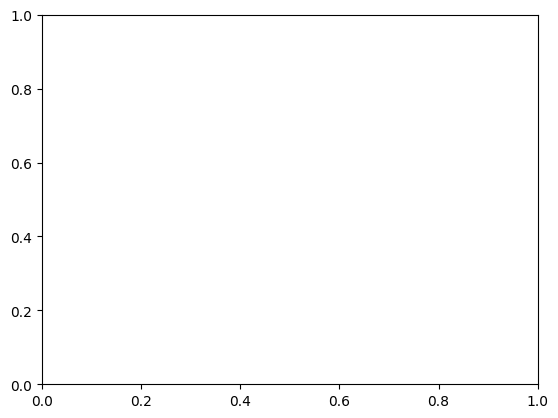

In [21]:
colors = ['red', 'blue', 'green']

# Create the scatter plot
plt.scatter(df['Study Hours'], df['Test Scores'], c=colors)


In [28]:
## Attempt at graphing rishonim

## Attempt at graphing rishonim

In [29]:
df

,Student,Color,Study Hours,Test Scores
0,Alice,red,0,10
1,Bob,yellow,4,50
2,Charlie,blue,7,80


In [24]:
data = {
    'Alice': [[0, 1, 2, 3], [10, 20, 30, 40]],
    'Bob': [[4, 5, 6], [50, 60, 70]],
    'Charlie': [[7, 8, 9, 10], [80, 90, 100, 110]]
}

In [38]:
data

{'Alice': [[0, 1, 2, 3], [10, 20, 30, 40]],
 'Bob': [[4, 5, 6], [50, 60, 70]],
 'Charlie': [[7, 8, 9, 10], [80, 90, 100, 110]]}

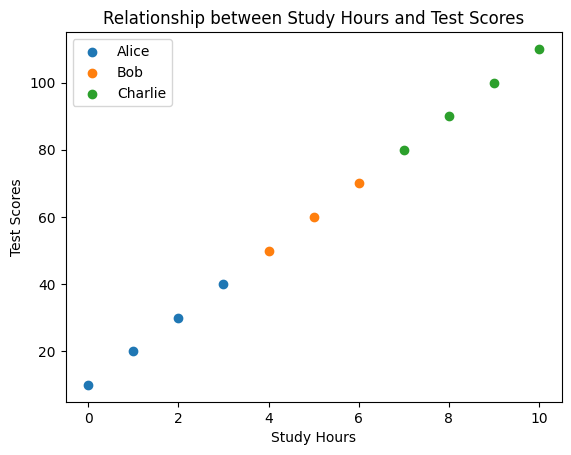

In [27]:
# Loop through the data and plot each student's data
for student, (study_hours, test_scores) in data.items():
    plt.scatter(study_hours, test_scores, label=student)

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')
plt.title('Relationship between Study Hours and Test Scores')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Loop through the data and plot each student's data
for student, (study_hours, test_scores) in data.items():
    plt.scatter(study_hours, test_scores, label=student)

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')
plt.title('Relationship between Study Hours and Test Scores')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [40]:
for index, row in df.iterrows():
    plt.scatter(Source)
    print(row['Person'], row['Abarbanel (Source)'])


Ricki Heicklen 4
Joe Blumberg 4
Daniel Peled-Schwartz 5
Avital Morris 8
Chana Fisch 5
Jen Greenberg 1
Jasmine Peled-Schwartz 2
Ronit Morris 6
Susan Palefsky 2
Tadhg Cleary 7
Shalhevet Schwartz 6


In [47]:
df = df.assign(Sources=lambda x: (x['Abarbanel (Source)'], x['Bartenura (Source)']))

ValueError: Length of values (2) does not match length of index (11)

In [51]:
def sources_and_wines(group):
    sources = group[sources].values.tolist()
    wines = group[wines].values.tolist()
    return pd.Series({"sources": sources, "wines": wines})

df_new = df.groupby("Person").apply(scores_and_dates).reset_index()

NameError: name 'scores_and_dates' is not defined

In [54]:
df.drop(tyoe)

NameError: name 'tyoe' is not defined